# **Data Sci Eng Methods (INFO 6105)**

##**Assignment 5 – Combine Data Cleaning, Feature Selection, Modeling and Interpretability into one report**

##**Name: Sangram Anil Shinde**

Combine Data Cleaning, Feature Selection, Modeling, and Interpretability into one report (Every assignment except TMINST) and make it a cohesive readable report.



The focus is readability and clarity.



The following must be answered:

1. What is the question?

2. What did you do?

3. How well did it work?

4. What did you learn?



#**Abstract**

This report presents a comprehensive analysis of the Customer Segmentation Classification dataset. Our objective was to apply data science techniques to classify the customers into four segments and understand the underlying factors influencing these outcomes. Through a methodical approach combining data cleaning, feature selection, modeling, and interpretability, we derived key insights that contribute significantly to the field of data science and machine learning.


#**Objective**

The Customer Segmentation Classification dataset dataset contains a lot of information about different factors like age, gender, profession, etc. These details help us understand to predict the right segment of the new customers. The project looked closely at this information using various data science tools and methods. We didn't just use standard ways of analyzing data; we also used advanced machine learning techniques to get a better idea of how these different factors affect the customer segmentation. The goal was to accurately predict to which segement a customer belonged based on these factors and to understand why they were assigned to this specific segement. In short, the goal of the project was to combine data science techniques and an understanding of existing automobile market to provide useful and meaningful insights to help the company to predict the right group of the new customers for their newly launched product.



#**Methodology**
Our methodology was structured into several key stages:

### Data Preparation and Cleaning:
- **Rigorous data cleaning** to address anomalies, outliers, and missing values.
- **Normalization and transformation** of features to ensure consistency and comparability.

### Exploratory Data Analysis (EDA):
- **Comprehensive EDA** to uncover trends, patterns, and correlations within the dataset.
- **Visualization techniques** to aid in understanding the data distribution and feature relationships.

### Feature Selection and Engineering:
- **Application of statistical methods** to identify significant predictors of income.
- **Engineering new features** to enhance model performance and interpretability.

### Model Development and Evaluation:
- **Utilization of H2O.ai's AutoML** for efficient and effective model exploration.
- **Assessment of various models** including logistic regression, tree-based models, and ensemble methods.

### Hyperparameter Tuning:
- **Employing techniques like Grid Search** for optimizing model parameters.
- **Balancing model complexity** with generalizability to avoid overfitting.

### Model Interpretability:
- **Implementation of SHAP analysis** for a deeper understanding of feature impacts.
- **Ensuring transparency and clarity** in how models make predictions.


# About Dataset

**CONTEXT**



> An automobile company has plans to enter new markets with their existing products (P1, P2, P3, P4, and P5). After intensive market research, they’ve deduced that the behavior of the new market is similar to their existing market.

> In their existing market, the sales team has classified all customers into 4 segments (A, B, C, D ). Then, they performed segmented outreach and communication for a different segment of customers. This strategy has work e exceptionally well for them. They plan to use the same strategy for the new markets and have identified 2627 new potential customers.

> You are required to help the manager to predict the right group of the new customers.



**CONTENT**

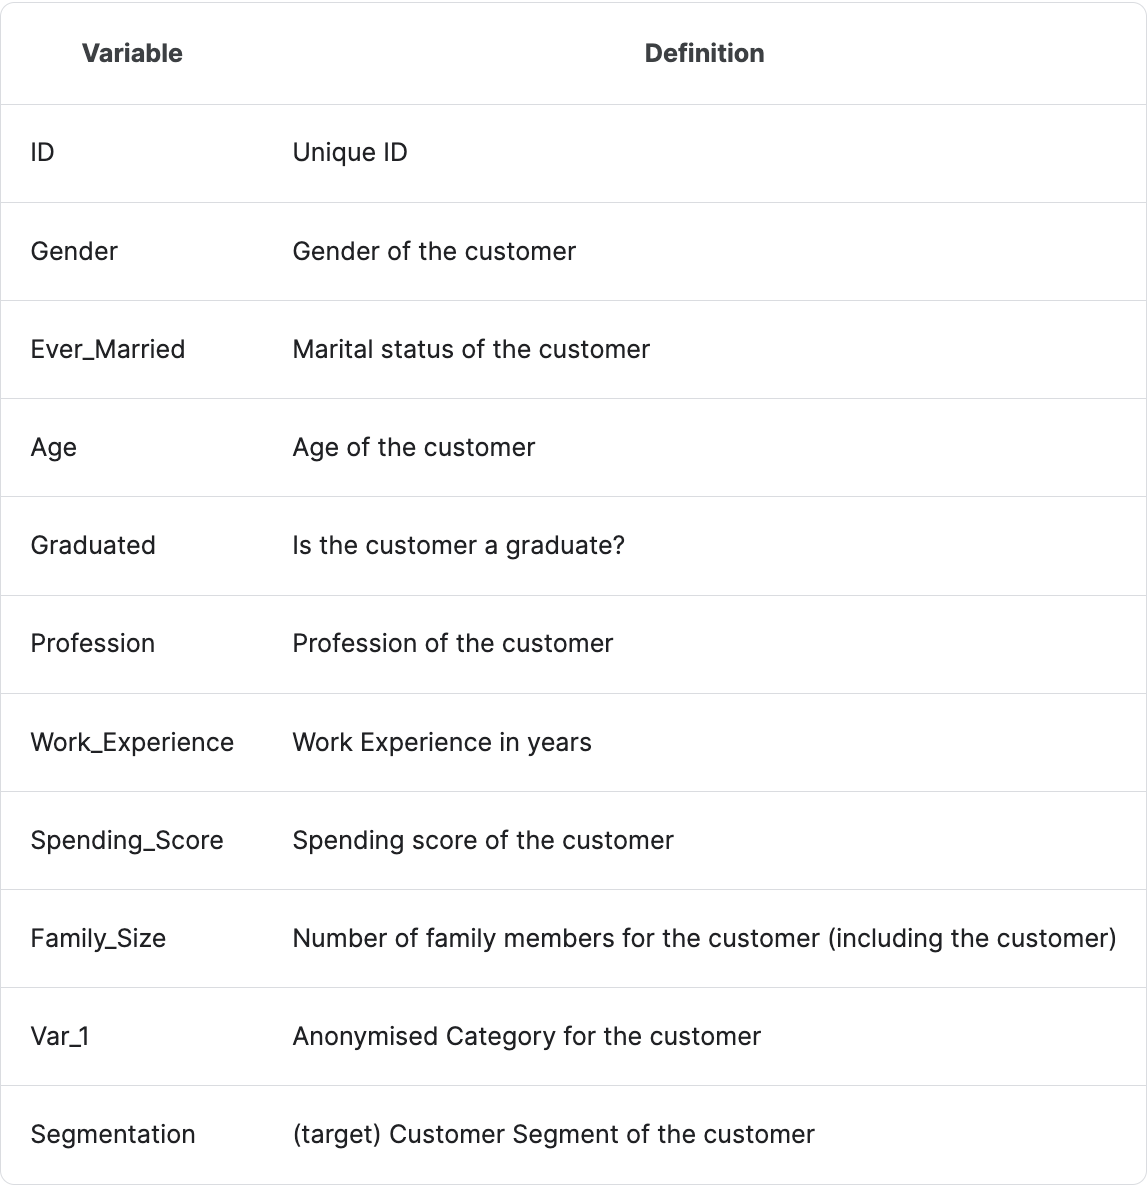









# **Importing Libraries and H2O cluster initialization**

AutoML, short for Automated Machine Learning, is an approach that automates the process of training and optimizing machine learning models. Its primary goal is to make machine learning more accessible to individuals and organizations by reducing the expertise and time required to develop effective models. AutoML tools and platforms like H2O.ai's AutoML provide end-to-end automation for various machine learning tasks, such as model selection, hyperparameter tuning, feature engineering, and model evaluation.

H2O.ai's AutoML is a powerful tool for organizations and data scientists looking to streamline their machine learning projects, particularly when dealing with limited resources or when they want to quickly prototype and evaluate different machine learning techniques. It democratizes machine learning by making it more accessible to a broader audience.


In [ ]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future

In [ ]:
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.6/265.6 MB 2.4 MB/s eta 0:00:00


In [ ]:
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from sklearn.model_selection import train_test_split as tts
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from yellowbrick.regressor import ResidualsPlot
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [ ]:
min_mem_size=6
run_time=222

In [ ]:
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

6


In [ ]:
port_no=random.randint(5555,55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)
  h2o.cluster().shutdown()
  sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:10669..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.22" 2024-01-16; OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1); OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp7y8r5h9a
  JVM stdout: /tmp/tmp7y8r5h9a/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp7y8r5h9a/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:10669
Connecting to H2O server at http://127.0.0.1:10669 ... successful.


H2O_cluster_uptime:,07 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,20 days
H2O_cluster_name:,H2O_from_python_unknownUser_r9ghp8
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


# Importing and preprocessing the data

In [ ]:
url = 'https://raw.githubusercontent.com/SangramSA/Data_Science/main/Train.csv'
df = pd.read_csv(url)
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [ ]:
# checking the shape of the dataframe
df.shape

(8068, 11)

Check the datatypes of the columns whether they are numerical or categorical.

In [ ]:
# printing all the datatypes of respective columns
df.dtypes

ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

As we can see there are 4 numerical columns and 7 categorical columns.

The numerical columns are:
                 
1. ID
2. Age
3. Work_Experience
4. Family_Size    
                
The categorical columns are:

1. Gender              
2. Ever_Married
3. Graduated
4. Profession
5. Spending_Score
6. Var_1
7. Segmentation(Target)



**Overview of missing values**

In [ ]:
# Checking null values
missing_values = df.isnull().sum()
missing_values

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

**Dropping the ID column since it has no relevance**

In [ ]:
df.drop('ID', axis=1, inplace=True)

**KNN Imputer to handle missing numerical data**



> `KNNImputer` is a class in scikit-learn for imputing missing values in datasets using the k-nearest neighbors algorithm. It replaces missing values with values from nearby neighbors based on similarity.








In [ ]:
from sklearn.impute import KNNImputer
df_before_impute = df.copy()
# Identifying numerical columns in the dataset
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Creating the KNN imputer instance
knn_imputer = KNNImputer(n_neighbors=5)

df[numerical_columns] = knn_imputer.fit_transform(df[numerical_columns])


 **OrdinalEncoder**

> OrdinalEncoder is a utility class in scikit-learn used for encoding categorical features with ordinal labels. It transforms categorical variables into integers, assigning a unique integer to each category in the feature. This encoding is useful when the categories have a natural ordering, such as "low", "medium", and "high", or "cold", "warm", and "hot". The OrdinalEncoder class follows the fit-transform paradigm, where you fit it on your data to learn the unique categories and their corresponding integer labels, and then transform your data to replace the categorical values with their integer representations.



In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Identifying categorical columns in the dataset
categorical_columns = df.select_dtypes(include=['object']).columns

# Creating an ordinal encoder instance (KNNImputer works with numerical data, so we need to convert categorical data to numerical)
ordinal_encoder = OrdinalEncoder()

df[categorical_columns] = ordinal_encoder.fit_transform(df[categorical_columns])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           8068 non-null   float64
 1   Ever_Married     7928 non-null   float64
 2   Age              8068 non-null   float64
 3   Graduated        7990 non-null   float64
 4   Profession       7944 non-null   float64
 5   Work_Experience  8068 non-null   float64
 6   Spending_Score   8068 non-null   float64
 7   Family_Size      8068 non-null   float64
 8   Var_1            7992 non-null   float64
 9   Segmentation     8068 non-null   float64
dtypes: float64(10)
memory usage: 630.4 KB


In [ ]:
# Creating the KNN imputer instance
knn_imputer = KNNImputer(n_neighbors=5)

df[categorical_columns] = knn_imputer.fit_transform(df[categorical_columns])

In [ ]:
df['Family_Size'] = df['Family_Size'].round()
df['Ever_Married'] = df['Ever_Married'].round()
df['Graduated'] = df['Graduated'].round()
df['Profession'] = df['Profession'].round()
df['Var_1'] = df['Var_1'].round()
for column in df:

    # Select column contents by column
    # name using [] operator
    columnSeriesObj = df[column]
    print('Column Name : ', column)
    print('Column Contents : ', df[column].value_counts())

Column Name :  Gender
Column Contents :  1.0    4417
0.0    3651
Name: Gender, dtype: int64
Column Name :  Ever_Married
Column Contents :  1.0    4727
0.0    3341
Name: Ever_Married, dtype: int64
Column Name :  Age
Column Contents :  35.0    250
37.0    234
33.0    232
42.0    232
40.0    229
       ... 
78.0     29
87.0     28
76.0     27
80.0     24
85.0     22
Name: Age, Length: 67, dtype: int64
Column Name :  Graduated
Column Contents :  1.0    5013
0.0    3055
Name: Graduated, dtype: int64
Column Name :  Profession
Column Contents :  0.0    2519
5.0    1346
3.0     967
2.0     721
1.0     714
4.0     634
7.0     623
8.0     292
6.0     252
Name: Profession, dtype: int64
Column Name :  Work_Experience
Column Contents :  1.0     2385
0.0     2318
9.0      474
8.0      463
2.0      326
3.0      279
4.0      267
6.0      215
7.0      204
5.0      202
0.8       59
0.6       58
3.8       56
10.0      53
11.0      50
12.0      48
2.2       47
13.0      46
14.0      45
2.8       43
1.2   

**MinMaxScaler**

> MinMaxScaler is a preprocessing class in scikit-learn used for scaling features to a specified range, typically between 0 and 1. It transforms each feature individually by scaling it to a given range, preserving the shape of the original distribution. This scaling is useful when you want to standardize the range of features in your dataset, especially for algorithms that are sensitive to the scale of the input data, such as gradient descent-based algorithms. The MinMaxScaler class follows the fit-transform paradigm, where you fit it on your data to learn the minimum and maximum values of each feature, and then transform your data to scale each feature to the specified range.



In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

# Scaling the training data
df = pd.DataFrame(min_max_scaler.fit_transform(df), columns=df.columns)

# Display the first few rows of the scaled training data
print(df.head())


   Gender  Ever_Married       Age  Graduated  Profession  Work_Experience  \
0     1.0           0.0  0.056338        0.0       0.625         0.071429   
1     0.0           1.0  0.281690        1.0       0.250         0.314286   
2     0.0           1.0  0.690141        1.0       0.250         0.071429   
3     1.0           1.0  0.690141        1.0       0.875         0.000000   
4     0.0           1.0  0.309859        1.0       0.375         0.528571   

   Spending_Score  Family_Size     Var_1  Segmentation  
0             1.0        0.375  0.500000      1.000000  
1             0.0        0.250  0.500000      0.000000  
2             1.0        0.000  0.833333      0.333333  
3             0.5        0.125  0.833333      0.333333  
4             0.5        0.625  0.833333      0.000000  


# **Analysis of numerical and categorical variables**

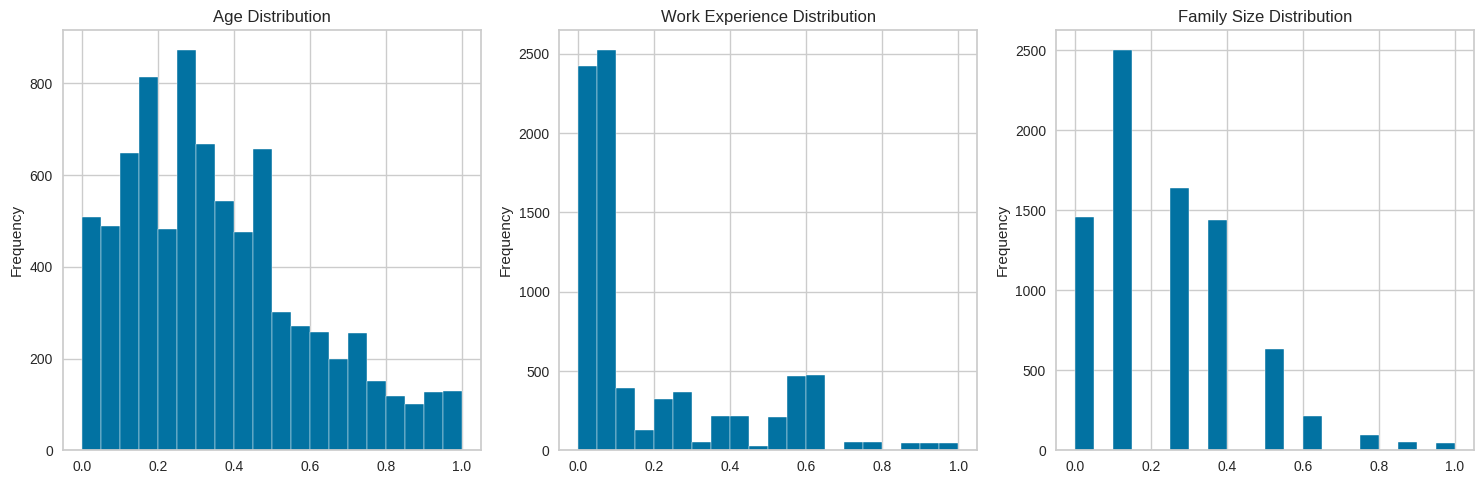

In [ ]:
# Plotting histograms for the numeric variables in the training dataset
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plotting 'Age'
df['Age'].plot(kind='hist', bins=20, ax=axes[0], title='Age Distribution')

# Plotting 'Work_Experience'
df['Work_Experience'].plot(kind='hist', bins=20, ax=axes[1], title='Work Experience Distribution')

# Plotting 'Family_Size'
df['Family_Size'].plot(kind='hist', bins=20, ax=axes[2], title='Family Size Distribution')

plt.tight_layout()
plt.show()


The histograms above show the distributions of the numeric variables in the dataset:

*   Age Distribution: This appears to be somewhat normally distributed but slightly right-skewed, indicating that there are more younger individuals in the dataset than older ones.
*   Work Experience Distribution: This is highly right-skewed, with a majority of individuals having low work experience years and a few individuals with high work experience.
*   Family Size Distribution: This also exhibits a right-skewed distribution, with most individuals having smaller family sizes and fewer individuals with larger family sizes.











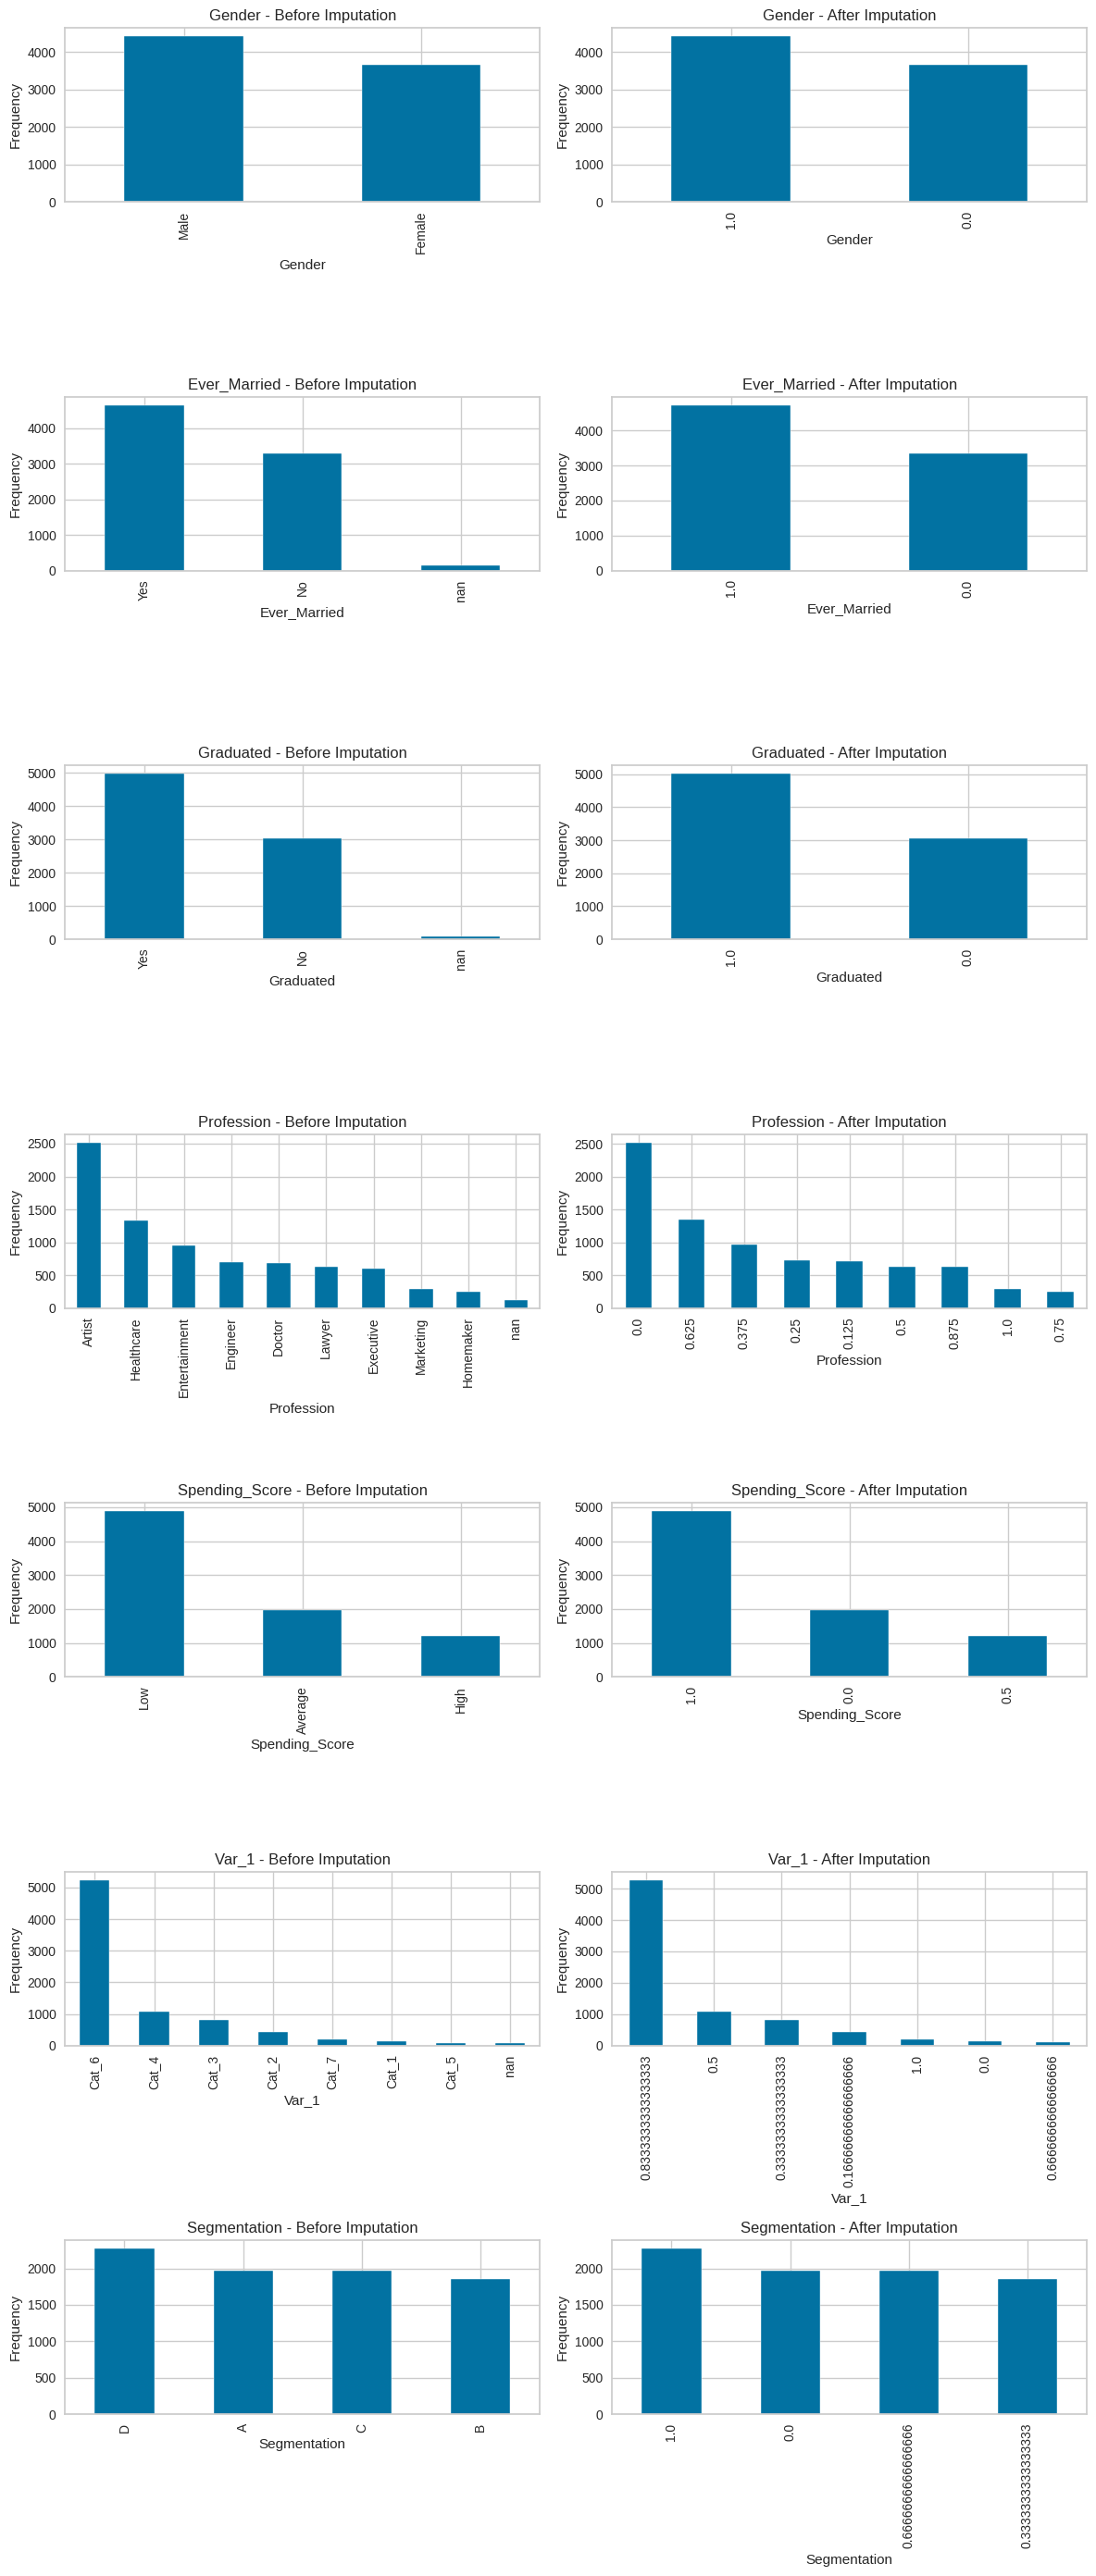

In [ ]:
import matplotlib.pyplot as plt

# Function to plot the frequency distribution of categorical columns before and after imputation
def plot_categorical_distribution(column, ax):
    # Before imputation
    df_before_impute[column].value_counts(dropna=False).plot(kind='bar', ax=ax[0], title=f'{column} - Before Imputation')
    ax[0].set_xlabel(column)
    ax[0].set_ylabel('Frequency')

    # After imputation
    df[column].value_counts(dropna=False).plot(kind='bar', ax=ax[1], title=f'{column} - After Imputation')
    ax[1].set_xlabel(column)
    ax[1].set_ylabel('Frequency')

# Creating subplots for each categorical column
fig, axes = plt.subplots(nrows=len(categorical_columns), ncols=2, figsize=(12, len(categorical_columns) * 4))

# Plotting each categorical column
for i, column in enumerate(categorical_columns):
    plot_categorical_distribution(column, axes[i])

plt.tight_layout()
plt.show()


From these graphs, you can observe the following for each categorical column:


*   The distributions remain fairly consistent across all the columns.

*   The imputation process has filled the missing values without significantly altering the distribution of each category.

This graphical validation indicates that the KNN imputation for categorical data has been effective and has preserved the overall structure and distribution of the categorical variables in the dataset.

# **Feature Selection**

**Check the correlation between all features in the data**

In [ ]:
df.corr()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
Gender,1.000000,0.117845,0.030216,-0.031560,0.024589,-0.057247,-0.054261,0.052296,0.030563,0.026403
Ever_Married,0.117845,1.000000,0.566100,0.199163,-0.140930,-0.099700,-0.631910,-0.086731,0.083448,-0.219928
Age,0.030216,0.566100,1.000000,0.237331,0.038756,-0.197310,-0.269544,-0.286367,0.168664,-0.243552
Graduated,-0.031560,0.199163,0.237331,1.000000,-0.302856,0.031032,-0.153428,-0.226342,0.126482,-0.180421
Profession,0.024589,-0.140930,0.038756,-0.302856,1.000000,-0.024564,0.234117,0.085496,-0.043025,0.211908
Work_Experience,-0.057247,-0.099700,-0.197310,0.031032,-0.024564,1.000000,0.047614,-0.054984,0.018266,0.014898
Spending_Score,-0.054261,-0.631910,-0.269544,-0.153428,0.234117,0.047614,1.000000,-0.108411,-0.033684,0.100572
Family_Size,0.052296,-0.086731,-0.286367,-0.226342,0.085496,-0.054984,-0.108411,1.000000,-0.146589,0.197916
Var_1,0.030563,0.083448,0.168664,0.126482,-0.043025,0.018266,-0.033684,-0.146589,1.000000,-0.017660
Segmentation,0.026403,-0.219928,-0.243552,-0.180421,0.211908,0.014898,0.100572,0.197916,-0.017660,1.000000


**Create the heat map of the correlation**

<Axes: >

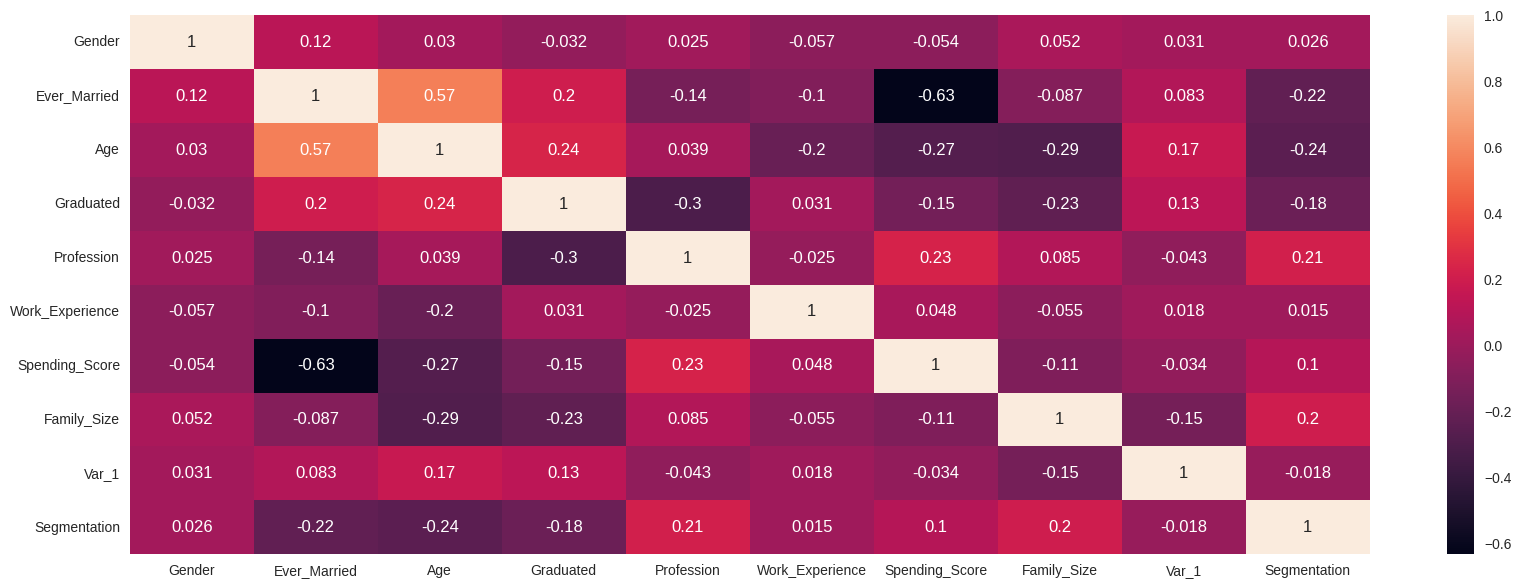

In [ ]:
plt.figure(figsize=(20,7))
sns.heatmap(df.corr(), annot=True)

From the heatmap, we observe that all the variables have significant correlation with our target variable income. Hence they are some or the other way related to the target variable and the target variable is dependent on them. Also, there isn't very high correlation between the independent variables, therefore there is no scope for Principal Component Analysis or Dimensionality reduction. There is no multicollinearity.

# **Model Implementation**

Now we are done with data pre-processing and feature engineering. Now we will employ various Machine Learning algorithms using H2O's AutoML library to fit our dataset, analyze the accuracy metrics and eventually decide which model fits our data best and how accurate it is.

In [ ]:
df['Segmentation'] = df['Segmentation'].astype(int)


In [ ]:
# splitting the  data into X and y variables where X is independent variables and y is target variable
X = df.drop(['Segmentation'],axis=1)
y = df['Segmentation']

**We will split the data into training and testing sets using the in-built train test split functionality of sklearn.**

In [ ]:
# splitting the data into train and test split
from sklearn.model_selection import train_test_split

# splitting the data into train and test in the ratio 80:20
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 42)

# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
# creating an instance of Logistic Regression model
logreg_model = LogisticRegression()

# Fitting the model on the training data
logreg_model.fit(X_train,y_train)

LogisticRegression()

## Model Interpretability

The coefficients from the logistic regression model represent the log odds of the target variable changing with a one-unit increase in the predictor variables, holding all other variables constant.

Positive coefficients indicate a positive relationship with the target variable.
Negative coefficients indicate a negative relationship with the target variable.

In [ ]:
# printing the log odds
log_odds = logreg_model.coef_[0]
pd.DataFrame(log_odds,
             X_train.columns,
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

,coef
Profession,2.570141
Spending_Score,1.326949
Work_Experience,0.425936
Gender,0.389254
Family_Size,0.062598
Var_1,0.051818
Ever_Married,-0.400898
Graduated,-0.867780
Age,-3.053677


Key Findings:
- Profession increases the log odds of the target outcome by approximately 2.57, suggesting a strong positive association.
- Spending_Score school education increases the log odds by about 1.33.
- On the contrary, being Graduated and Age, decreases the log odds of the target outcome by -0.87 and -3.05.

These coefficients are in log odds form. For more intuitive understanding, they can be converted to odds ratios.


Converting log odds to normal odds.

In [ ]:
odds = np.exp(logreg_model.coef_[0])
pd.DataFrame(odds,X_train.columns,  columns=['coef'])\
            .sort_values(by='coef', ascending=False)

,coef
Profession,13.067668
Spending_Score,3.769527
Work_Experience,1.531023
Gender,1.475879
Family_Size,1.064599
Var_1,1.053184
Ever_Married,0.669719
Graduated,0.419883
Age,0.047185




### Interpretation of Key Odds Ratios:

- **Profession (Odds Ratio: 13.067668)**: Having a profession increases the odds of being in the top segment by approximately 13.07 times. This significant increase suggests a strong positive association between this variable and segmentation.

- **Spending_Score (Odds Ratio: 3.769527)**: Spending score increases the odds of being in the top segment by approximately 3.77, indicating that spending score level is a key factor in determinig the segment of customer.

- **Work_Experience	 (Odds Ratio: 1.531023)**: Work experience enhances the odds of top segment by around 1.53 times. This reflects the value placed on higher work experience.

- **Gender (Odds Ratio: 1.475879)**: Gender increases the odds of being in the top segment by approximately 1.48 times.


### Negative Influences:

- **Ever_Married (Odds Ratio: 0.669719)**: Martial status of individuals have  about 67% of the odds of determining with segment they belong to.

- **Graduated (Odds Ratio: 0.419883)**: Graduation status decrease the odds of determining the segmentation by 42%.

- **Age (Odds Ratio: 	0.047185)**: Age of customer decreases the odds to just 4.71%.




# **Tree Based Model Using Random Forest**

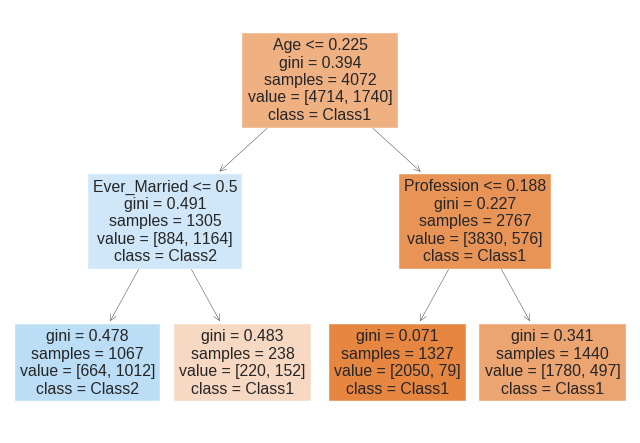

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
rf_model = RandomForestClassifier(n_estimators=10, max_depth=2, random_state=42)
rf_model.fit(X_train, y_train)

# Plot one of the treesplt.figure(figsize=(12, 8))
plot_tree(rf_model.estimators_[0], filled=True, feature_names=X.columns, class_names=['Class1', 'Class2'])
plt.show()

The decision tree starts by checking the Age feature; if Age is less than or equal to 0.225, it then looks at the Ever_Married feature. Nodes are split until the leaf nodes are reached, which provide the final class predictions. The tree's splits are based on minimizing Gini impurity, aiming to reach leaf nodes that are as pure as possible. In this tree, we have a range of Gini impurity from 0.071, indicating nearly perfect classification, to 0.48, indicating a node with a higher degree of class mixture. The number of samples and value counts at each node provide insight into the distribution of classes through the tree.

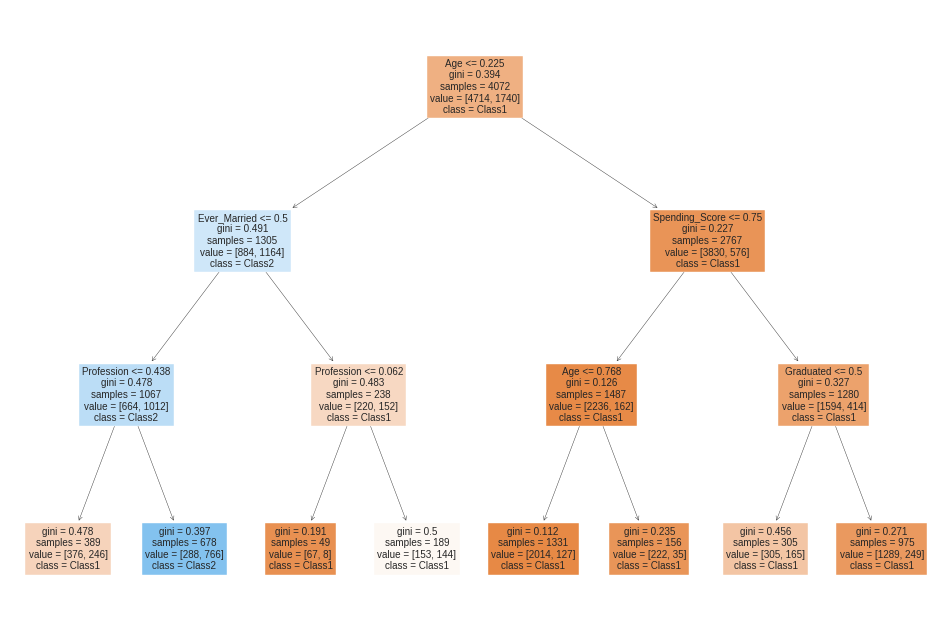

In [ ]:
rf_model = RandomForestClassifier(n_estimators=10, max_depth=3, random_state=42)
rf_model.fit(X_train, y_train)

random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train, y_train)

# Plot one of the trees
plt.figure(figsize=(12, 8))
plot_tree(rf_model.estimators_[0], filled=True, feature_names=X.columns, class_names=['Class1', 'Class2'])
plt.show()

The decision tree visualized here illustrates a classification model where decisions start at the root node based on the Age feature. Nodes in the tree represent decision points, splitting the data into increasingly pure child nodes, aiming for homogeneity in each subgroup as evidenced by the decreasing Gini impurity. For example, the root node splits based on Age <= 0.225, which leads to a left branch that further splits on Ever_Married <= 0.5, and each subsequent node further refines the classification based on features like Profession. Leaf nodes, where no further splits occur, signify the end result of the classification process. The value in each node shows the count of samples in Class1 and the other class. This tree's architecture implies that features such as Age, Profession, and Spending_Score are important for predicting the target class, impacting the largest number of samples.

In [ ]:
from sklearn.metrics import accuracy_score
preds = rf_model.predict(X_test)
print(accuracy_score(y_test, preds))


0.798636926889715


# **AUTO ML**

## Preparing data for modelling

**Preparing data for H2O**


In [ ]:
train = pd.concat([X_train,y_train],axis=1,keys=['X_train','y_train'])
test = pd.concat([X_test,y_test],axis=1,keys=['X_test','y_test'])

In [ ]:
train.columns = train.columns.droplevel(0)
test.columns = test.columns.droplevel(0)

Creating an H2O data frame so that we can feed it to the autoMl fit function.

In [ ]:
# creating a train and test H2O frame
hf = h2o.H2OFrame(train)
test_hf = h2o.H2OFrame(test)
hf.head()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,1,0.28169,1,0.125,0.0714286,1,0.375,0.333333,0
0,0,0.211268,0,0.25,0,1,0.5,0.333333,1
0,1,0.43662,0,0.25,0.0714286,1,0,1,0
0,0,0.112676,0,0.5,0.571429,1,0.25,0.833333,1
0,0,0.535211,1,0.125,0.214286,1,0,0.833333,0
0,1,0.338028,0,0.5,0.328571,0,0.125,0.5,1
1,1,0.732394,0,0.875,0,0.5,0.25,0,0
0,1,0.661972,1,0.875,0,1,0,0.833333,0
1,1,0.56338,0,0.5,0.857143,0.5,0.125,0.833333,0
0,0,0.253521,1,0,0.642857,1,0.25,0.5,0


In [ ]:
hf.columns

['Gender',
 'Ever_Married',
 'Age',
 'Graduated',
 'Profession',
 'Work_Experience',
 'Spending_Score',
 'Family_Size',
 'Var_1',
 'Segmentation']

In [ ]:
hf.types

{'Gender': 'int',
 'Ever_Married': 'int',
 'Age': 'real',
 'Graduated': 'int',
 'Profession': 'real',
 'Work_Experience': 'real',
 'Spending_Score': 'real',
 'Family_Size': 'real',
 'Var_1': 'real',
 'Segmentation': 'int'}

In [ ]:
# setting up the dataset to split into train and test H2Oframe
hf['Segmentation'] = hf['Segmentation'].asfactor()
predictors = hf.drop('Segmentation').columns
response = 'Segmentation'

In [ ]:
train_hf,val_hf = hf.split_frame(ratios=[.8],seed=1234)

## Auto ML- Modelling

Now we will try to fit the data to our AutoML function and analyze the different types of models that H2O employs for predtictions.

In [ ]:
aml = H2OAutoML(max_models=10,max_runtime_secs=300,seed=1234,exclude_algos = ["DeepLearning"])

In [ ]:
aml.train(x=predictors,y=response,training_frame=hf)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_1_AutoML_1_20240403_15836


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    49                 49                          25675                  6            13           9.40816       32            41            37.0408

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.10621416434014555
RMSE: 0.3259051462314542
LogLoss: 0.3334202691804811
Mean Per-Class Error: 0.18388141683532616
AUC: 0.9091745374424046
AUCPR: 0.8163265572244173
Gini: 0.8183490748848092

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3762007768618642
       0     1     Error    Rate
-----  ----  ----  -------  ---------------
0      4032  628   0.1348   (628.0/4660.0)
1      418   1376  0.233    (418.0/1794.0)
Total  4450  2004  0.1621   (1046.0/6454.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.376201     0.724592  197
max f2                       0.179764     0.806515  280
max f0point5                 0.531257     0.749211  135
max accuracy                 0.480956     0.849086  156
max precision                0.965998     1         0
max recall                   0.0205471    1         384
max specificity              0.965998     1         0
max absolute_mcc             0.401487     0.613059  186
max min_per_class_accuracy   0.311105     0.818841  223
max mean_per_class_accuracy  0.241817     0.820983  251
max tns                      0.965998     4660      0
max fns                      0.965998     1786      0
max fps                      0.00579249   4660      399
max tps                      0.0205471    1794      384
max tnr                      0.965998     1         0
max fnr                      0.965998     0.995541  0
max fpr                      0.00579249   1         399
max tpr                      0.0205471    1         384

Gains/Lift Table: Avg response rate: 27.80 %, avg score: 27.87 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100713                   0.957816           3.59755    3.59755            1                0.961357   1                           0.961357            0.0362319       0.0362319                  259.755   259.755            0.0362319
2        0.0201425                   0.953492           3.59755    3.59755            1                0.955486   1                           0.958422            0.0362319       0.0724638                  259.755   259.755            0.0724638
3        0.0300589                   0.950351           3.59755    3.59755            1                0.952135   1                           0.956348            0.0356745       0.108138                   259.755   259.755            0.108138
4        0.0401302                   0.946524           3.59755    3.59755            1                0.948579   1                           0.954398            0.0362319       0.14437                    259.755   259.755            0.14437
5        0.0500465                   0.93958            3.59755    3.59755            1                0.943618   1                          

The above results suggest the following:

The best model that fits our data is Stacked Ensemble with total of 5 base models including GBM,XGBoost, GLM, and DRF. It also inlcluded metalearner as GLM.
The model gives an train AUC of 0.94 and val AUC of 0.89. The f1 score for train and test are 0.786 and 0.68 suggesting that precision and recall have a good balance in both train and val. Hence the model does not overfit the data.
The train and val MSE are 0.088 and 0.119 which are respectable values suggesting the model fits the data well and it makes sense.
Also the data is able to very nicely handle data imbalance. It is not biased towards the class with people having any specific segment.

In [ ]:
# printing the leaderboard of top 10 models
lb = aml.leaderboard
lb

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_1_AutoML_1_20240403_15836,0.88047,0.370557,0.770543,0.206089,0.345486,0.119361
StackedEnsemble_BestOfFamily_1_AutoML_1_20240403_15836,0.880047,0.367215,0.770992,0.200358,0.344672,0.118799
StackedEnsemble_AllModels_1_AutoML_1_20240403_15836,0.879756,0.367566,0.770165,0.205366,0.344929,0.118976
GBM_2_AutoML_1_20240403_15836,0.878679,0.371984,0.768596,0.211019,0.346697,0.120199
GBM_3_AutoML_1_20240403_15836,0.875118,0.375533,0.765303,0.204807,0.348551,0.121488
XGBoost_3_AutoML_1_20240403_15836,0.874618,0.375513,0.763973,0.20842,0.349034,0.121825
GBM_4_AutoML_1_20240403_15836,0.87382,0.379208,0.761914,0.211001,0.350249,0.122674
XGBoost_1_AutoML_1_20240403_15836,0.872513,0.38198,0.760933,0.221158,0.352271,0.124095
XGBoost_2_AutoML_1_20240403_15836,0.870444,0.38718,0.759389,0.22202,0.35468,0.125798
XRT_1_AutoML_1_20240403_15836,0.865016,0.394694,0.749722,0.222121,0.355335,0.126263


Above table describes the top 10 models according to the AUC and other metrics. We will be fetching two models from the table for further analysis.

In [ ]:
#assign index values to all the models generated
model_index=0
index=0
gbm_model=''
aml_leaderboard_df=aml.leaderboard.as_data_frame()
models_dict={}
for m in aml_leaderboard_df['model_id']:
  models_dict[m]=model_index
  if 'StackedEnsemble' not in m:
    break
  model_index=model_index+1

for m in aml_leaderboard_df['model_id']:
  if 'GLM' in m:
    models_dict[m]=index
    break
  index=index+1
models_dict

{'GBM_1_AutoML_1_20240403_15836': 0, 'GLM_1_AutoML_1_20240403_15836': 11}

In [ ]:
#print the index value of best model
print(model_index)
best_model1 = h2o.get_model(aml.leaderboard[model_index,'model_id'])

0


In [ ]:
best_model1.algo

'gbm'

In [ ]:
# training the model
best_model1.train(x=predictors,y=response,training_frame=hf)

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_model_python_1712102005686_1924


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 50                          20556                  5            5            5             21            32            28

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.10120041914873584
RMSE: 0.3181201332024363
LogLoss: 0.3202948283262621
Mean Per-Class Error: 0.17500334926627145
AUC: 0.9161698987086185
AUCPR: 0.8378911657311621
Gini: 0.8323397974172371

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.37976067866834956
       0     1     Error    Rate
-----  ----  ----  -------  ---------------
0      4055  605   0.1298   (605.0/4660.0)
1      395   1399  0.2202   (395.0/1794.0)
Total  4450  2004  0.1549   (1000.0/6454.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.379761     0.736704  193
max f2                       0.162806     0.809662  290
max f0point5                 0.572097     0.778794  113
max accuracy                 0.469267     0.856368  154
max precision                0.981048     1         0
max recall                   0.0221062    1         386
max specificity              0.981048     1         0
max absolute_mcc             0.438575     0.633653  167
max min_per_class_accuracy   0.308999     0.827039  220
max mean_per_class_accuracy  0.344813     0.828205  205
max tns                      0.981048     4660      0
max fns                      0.981048     1787      0
max fps                      0.00941377   4660      399
max tps                      0.0221062    1794      386
max tnr                      0.981048     1         0
max fnr                      0.981048     0.996098  0
max fpr                      0.00941377   1         399
max tpr                      0.0221062    1         386

Gains/Lift Table: Avg response rate: 27.80 %, avg score: 27.81 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0110009                   0.975799           3.59755    3.59755            1                0.976965   1                           0.976965            0.0395764       0.0395764                  259.755   259.755            0.0395764
2        0.0201425                   0.974811           3.59755    3.59755            1                0.975185   1                           0.976157            0.0328874       0.0724638                  259.755   259.755            0.0724638
3        0.0385807                   0.973368           3.59755    3.59755            1                0.973634   1                           0.974951            0.0663322       0.138796                   259.755   259.755            0.138796
4        0.0416796                   0.97288            3.59755    3.59755            1                0.972998   1                           0.974806            0.0111483       0.149944                   259.755   259.755            0.149944
5        0.0508212                   0.972582           3.59755    3.59755            1                0.972637   1                       

The above results suggest the following:



*   The AUC value of 0.91 suggests a good magnitude of precision and recall.

*   MSE of 0.101 is really good indication of fit to the model.
*   The True positive and False positive rate values have a good balance for the dataset.


Interpretation of evaluation metrics.

*   **max precision**: The model demonstrates a high ability to correctly classify positive instances while minimizing false positives. This suggests that when the model predicts a positive outcome, it is often correct.

*   **max recall**: The model captures a high proportion of actual positive instances. It indicates a strong ability to identify positive cases when they occur, but it may come at the cost of increased false positives.

*   **max specificity**: The model effectively identifies true negatives, which is important when minimizing false alarms is a priority. It suggests that the model is good at classifying negative cases correctly.



# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## GBM_model_python_1712102005686_1924

,0,1,Error,Rate
0,792.0,120.0,0.1316,(120.0/912.0)
1,79.0,277.0,0.2219,(79.0/356.0)
Total,871.0,397.0,0.1569,(199.0/1268.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

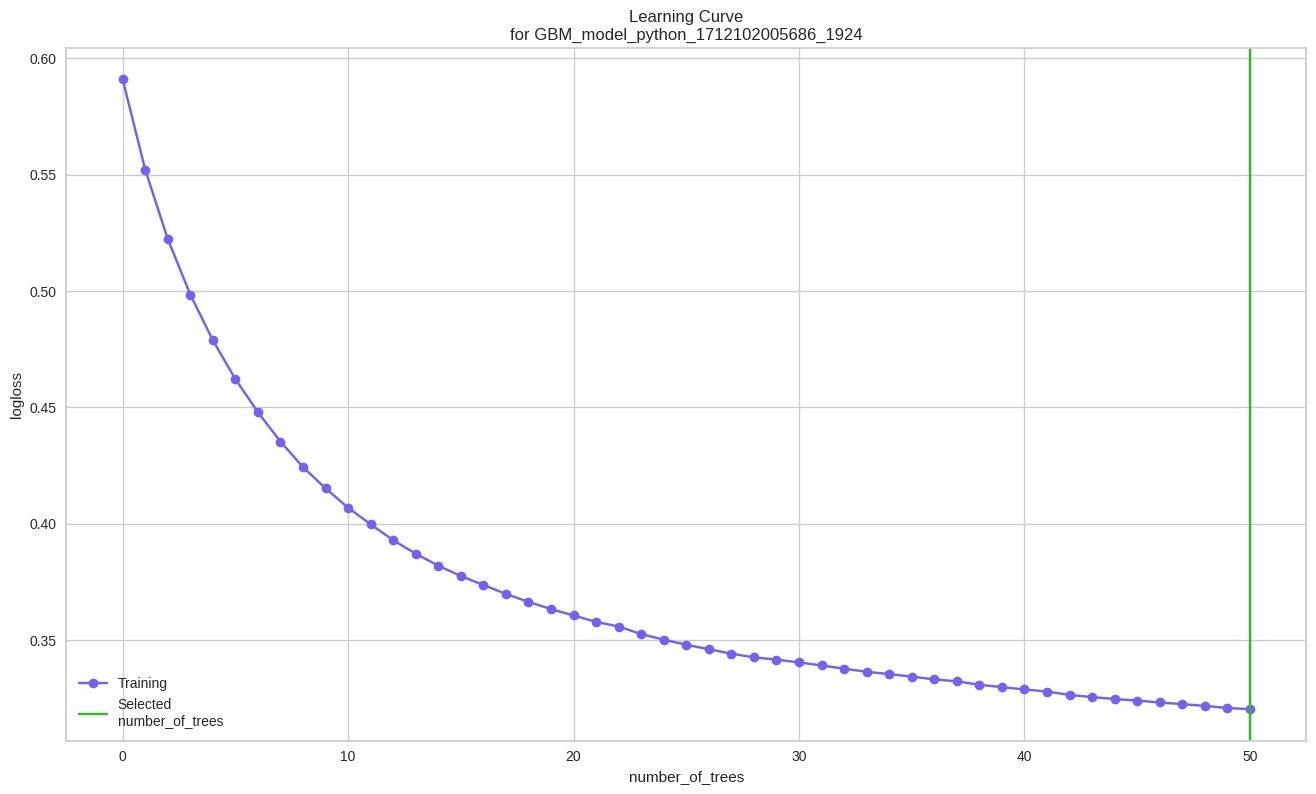

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

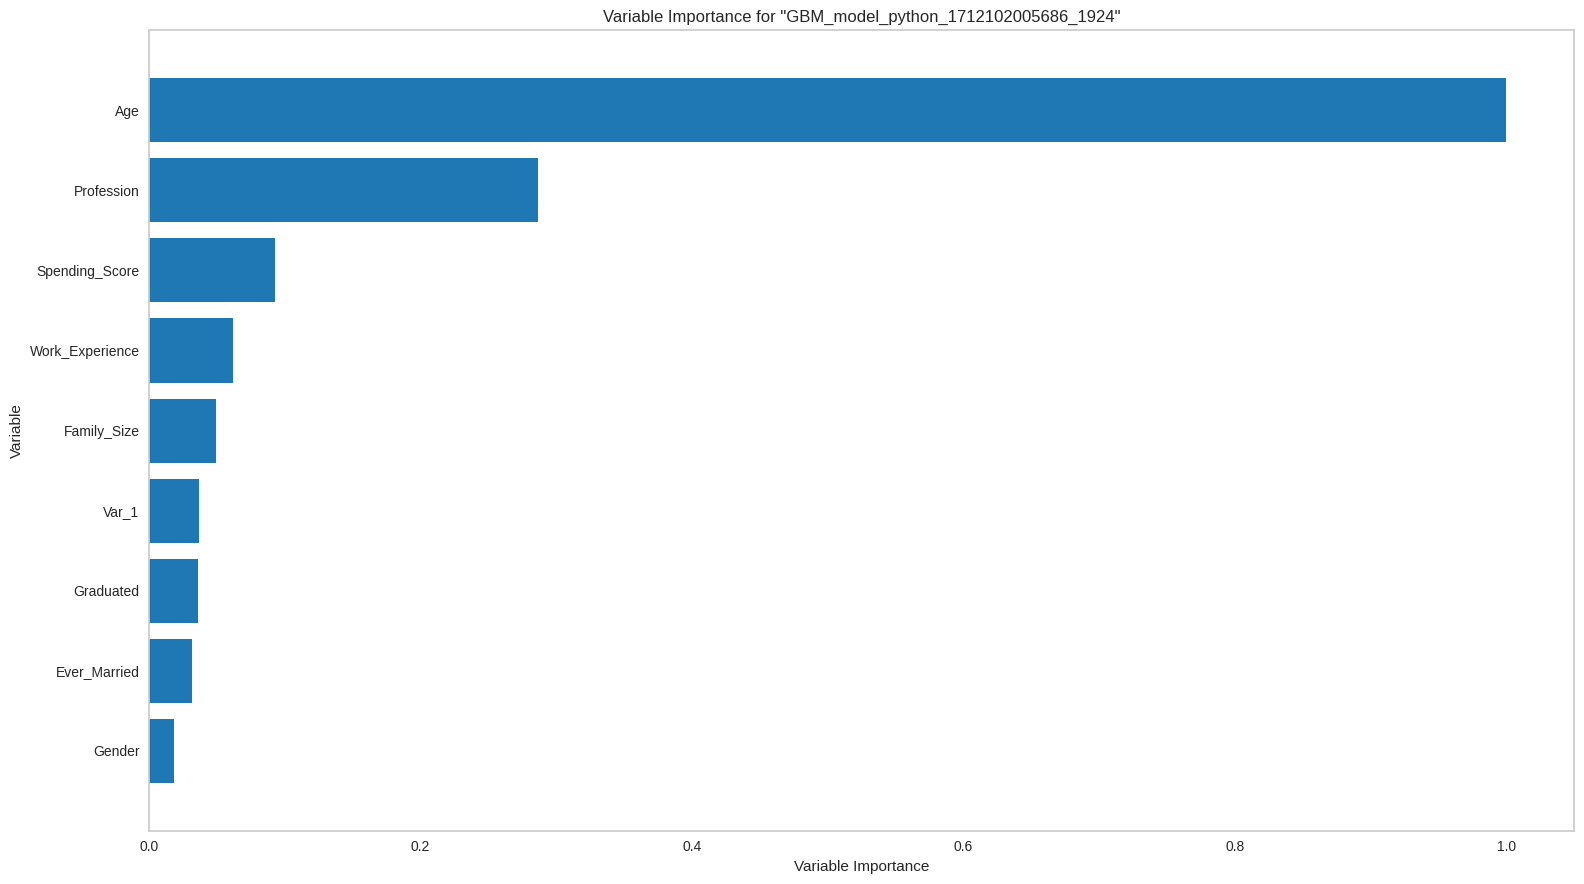

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

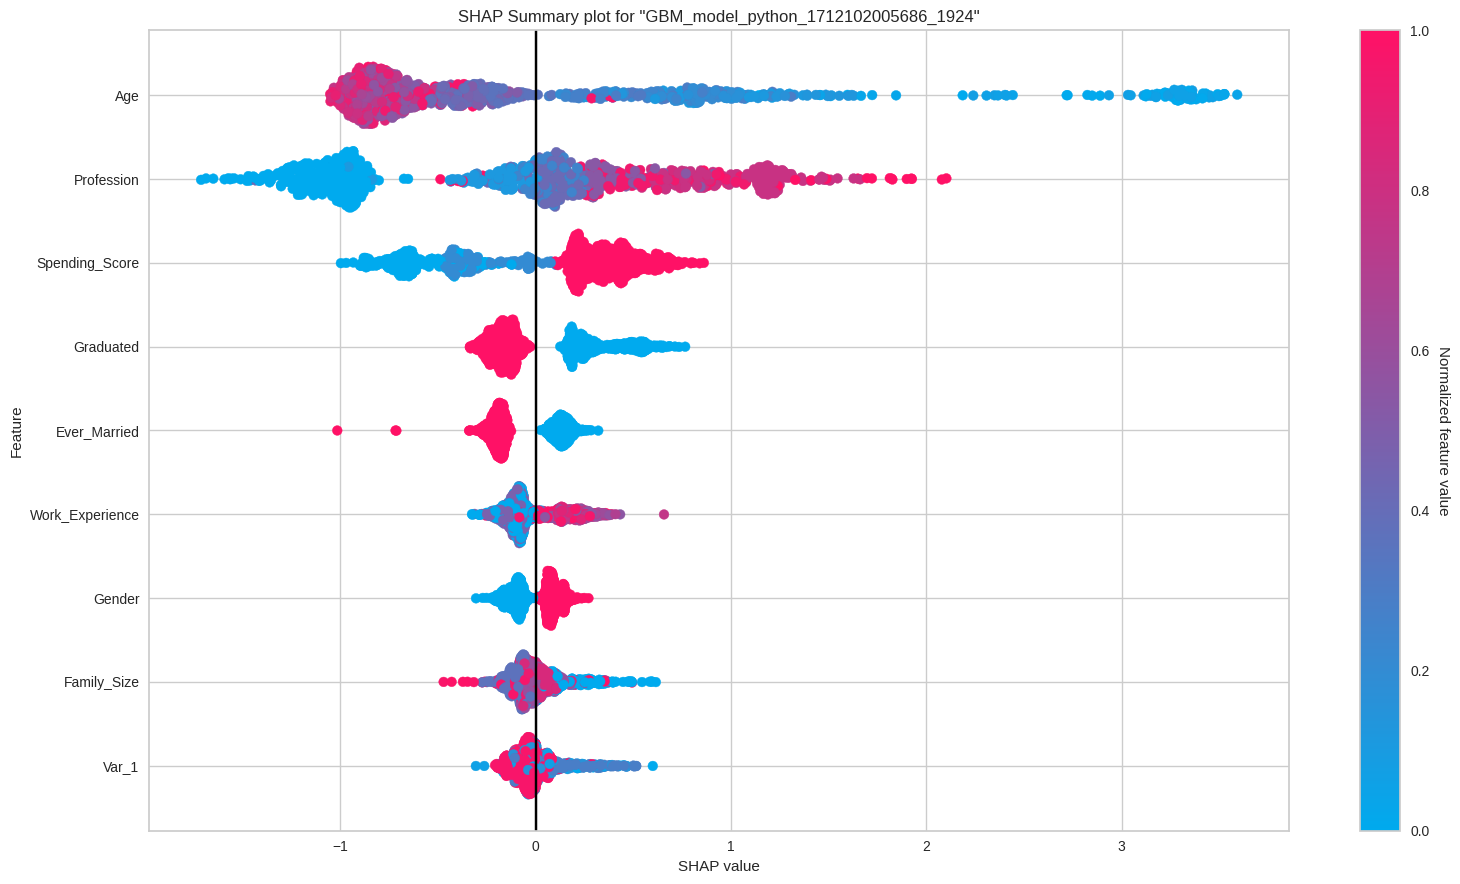

In [ ]:
# gives a visual explanation of the model
exm = best_model1.explain(val_hf,exclude_explanations=['pdp','ice'])

Above displayed plots suggest the following:

* For the learning curve plot as the iterations increase the loss eventually decreases till iteration 50 and then becomes constant. This proves that the model does not overfit the data because in that case, the loss would again start increasing with further iterations.

* The variable importance plot shows the relative importance of the most important variables in the model. The most imporant features are Age and Profession.

11
glm


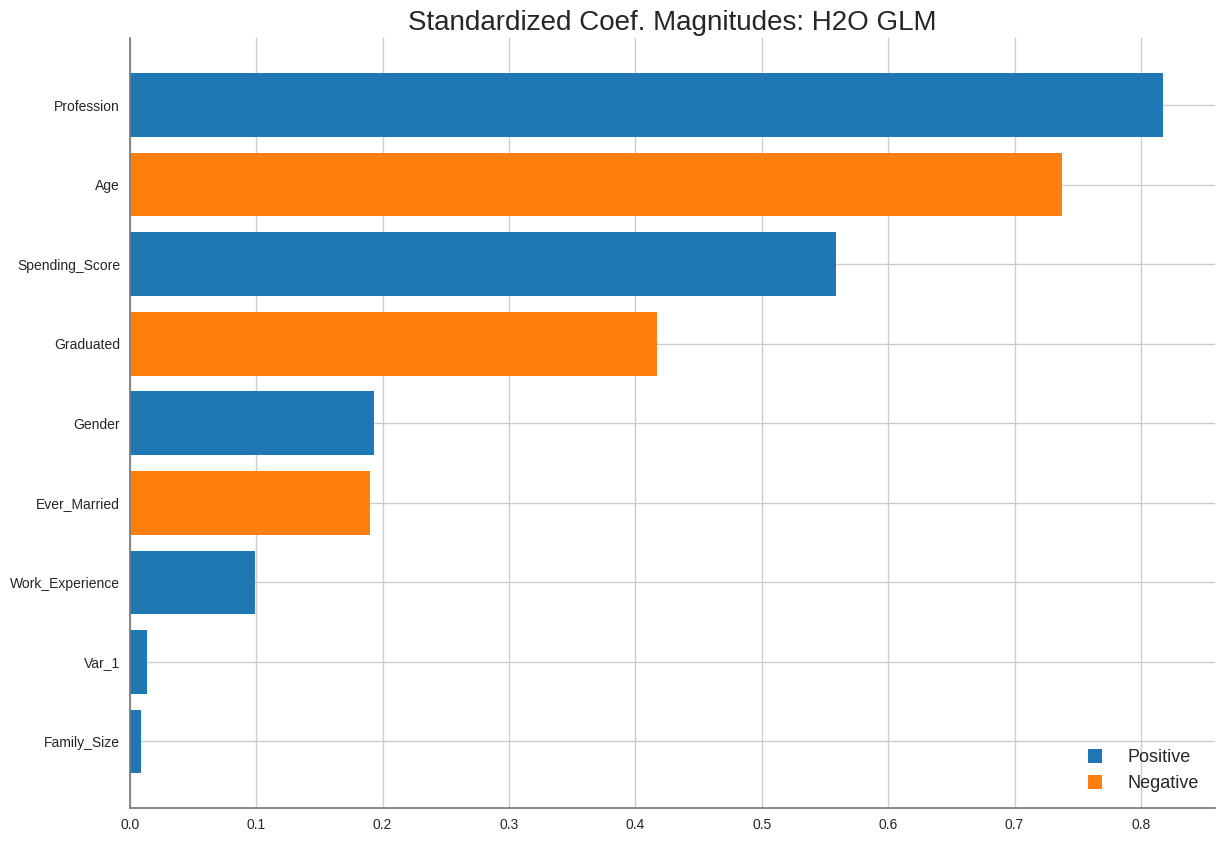

In [ ]:
if index is not 0:
  print(index)
  gbm_model1=h2o.get_model(aml.leaderboard[index,'model_id'])
  print(gbm_model1.algo)
  gbm_model1.std_coef_plot()

###**Hyperparamter Tuning**

The crucial process of determining the appropriate configuration for a machine learning model's hyperparameters in order to improve its performance and generalisation ability is known as hyperparameter tuning. These hyperparameters, which are not learnt from data, have a considerable influence on model behaviour. Grid search is a popular hyperparameter optimisation strategy that includes setting a set of hyperparameters and systematically looking through all possible combinations, assessing the model's performance for each set of parameters. The goal is to find the combination that produces the best results based on a given assessment criteria, hence boosting the model's efficacy across diverse tasks and applications.

We use H2OGridSearch library to perform grid search and hyperparameter tuning. We give a set of hyperparameter values beforehand and the GridSearch model tells us which hyperparamters give us the best results.

In [ ]:
# Import necessary libraries
from h2o.grid.grid_search import H2OGridSearch
from h2o.estimators import H2OGeneralizedLinearEstimator

# Define the GLM hyperparameter grid
hyperparameters = {
    'alpha': [0.1, 0.5, 0.9],
    'lambda': [0.001,0.02,0.00002],
}

# Create the grid search object
grid = H2OGridSearch(model=H2OGeneralizedLinearEstimator,
                    hyper_params=hyperparameters)

# Train the models with different hyperparameter combinations
grid.train(x=predictors, y=response, training_frame=hf)

# Get the best model based on a specified metric (
grid_sorted = grid.get_grid(sort_by='logloss', decreasing=False)
best_model = grid_sorted.models[0]

# Make predictions and evaluate the best model
predictions = best_model.predict(test_hf)

# Evaluate the model's performance
performance = best_model.model_performance(test_hf)
print("Best Model Performance:")
print(performance)


glm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%
glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Best Model Performance:
ModelMetricsBinomialGLM: glm
** Reported on test data. **

MSE: 0.13346566685415137
RMSE: 0.3653295318669863
LogLoss: 0.41835791021008994
AUC: 0.858344437041972
AUCPR: 0.7004950662244412
Gini: 0.7166888740839441
Null degrees of freedom: 1613
Residual degrees of freedom: 1604
Null deviance: 1956.2402005557144
Residual deviance: 1350.4593341581703
AIC: 1370.4593341581703

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.36542931592291367
       0     1    Error    Rate
-----  ----  ---  -------  --------------
0      972   168  0.1474   (168.0/1140.0)
1      140   334  0.2954   (140.0/474.0)
Total  1112  502  0.1908   (308.0/1614.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
--------------------

In [ ]:
# Extract and print the best hyperparameters
best_hyperparameters = best_model.actual_params
print("Best Hyperparameters:")
best_hyperparameters

Best Hyperparameters:


{'model_id': 'Grid_GLM_py_2_sid_8a69_model_python_1712102005686_1978_model_8',
 'training_frame': 'py_2_sid_8a69',
 'validation_frame': None,
 'nfolds': 0,
 'checkpoint': None,
 'export_checkpoints_dir': None,
 'seed': 5873604516008549464,
 'keep_cross_validation_models': True,
 'keep_cross_validation_predictions': False,
 'keep_cross_validation_fold_assignment': False,
 'fold_assignment': None,
 'fold_column': None,
 'response_column': 'Segmentation',
 'ignored_columns': None,
 'random_columns': None,
 'ignore_const_cols': True,
 'score_each_iteration': False,
 'score_iteration_interval': -1,
 'offset_column': None,
 'weights_column': None,
 'family': 'binomial',
 'rand_family': None,
 'tweedie_variance_power': 0.0,
 'tweedie_link_power': 1.0,
 'theta': 1e-10,
 'solver': 'IRLSM',
 'alpha': [0.5],
 'lambda': [2e-05],
 'lambda_search': False,
 'early_stopping': True,
 'nlambdas': -1,
 'standardize': True,
 'missing_values_handling': 'MeanImputation',
 'plug_values': None,
 'compute_p_va

So the above array shows the best hyperparamters found. From our given set of hypeparameters alpha and lambda, the best results are acheived for alpha of 0.5 and lambda of 0.00002.

### **Regularization**

Regularisation is a method used in machine learning and statistics to reduce overfitting and enhance model generalisation. It does this by including a penalty term in the loss function of the model, which encourages it to maintain model parameters (weights) within predefined boundaries. L1 and L2 regularisation are two types of regularisation procedures that are often used:

*   L1 Regularization (Lasso): L1 regularization adds a penalty term to the loss function that is proportional to the absolute values of the model's parameters. It encourages some of the model's parameters to become exactly zero, effectively selecting a subset of the most important features while setting others to zero. L1 regularization is useful for feature selection and creating simpler, more interpretable models.

*   L2 Regularization (Ridge): L2 regularization adds a penalty term to the loss function that is proportional to the square of the model's parameters. It prevents any single parameter from becoming excessively large, thus encouraging all parameters to be small but non-zero. L2 regularization is effective at preventing multicollinearity and improving the stability of the model.

In the below code we use lambda for applying regularization.


Lambda (λ) is a key hyperparameter in generalized linear models (GLMs) used for regularization. A higher λ value increases the strength of regularization, reducing model complexity, preventing overfitting, and promoting robust generalization. The new_lambda of 0.1 in the code creates a new GLM model with relatively mild regularization. The choice of λ depends on the data and the balance between model complexity and overfitting, requiring experimentation for optimal performance in specific tasks.

In [ ]:
import h2o
from h2o.estimators import H2OGeneralizedLinearEstimator

# Loading existing trained GLM model
existing_model = h2o.get_model(best_model1.model_id)

# Creating a new GLM model with a different lambda value
new_lambda = 0.00002  # Set your desired lambda value
new_glm_model = H2OGeneralizedLinearEstimator(
    family='binomial',  # Choose the appropriate family for your problem
    lambda_=new_lambda
)

# Train the new model using the same data as the existing model
new_glm_model.train(x=predictors, y=response, training_frame=hf)

# Evaluate the existing and new models
existing_model_performance = existing_model.model_performance(hf)
new_model_performance = new_glm_model.model_performance(hf)

# Compare the performance of the two models
print("Existing Model Performance:")
print(existing_model_performance)
print("New Model Performance:")
print(new_model_performance)


glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Existing Model Performance:
ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.10120041932830483
RMSE: 0.3181201334846709
LogLoss: 0.32029482826880207
Mean Per-Class Error: 0.17500334926627145
AUC: 0.9161671475256099
AUCPR: 0.8379085224860696
Gini: 0.8323342950512198

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.37976070370540393
       0     1     Error    Rate
-----  ----  ----  -------  ---------------
0      4055  605   0.1298   (605.0/4660.0)
1      395   1399  0.2202   (395.0/1794.0)
Total  4450  2004  0.1549   (1000.0/6454.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.379761     0.736704  189
max f2                       0.162057     0.809427  286
max f0point5                 0.572097     0.778794  1

After changing the lamda values there is a difference between the evaluation metrics.For lamda 0.00002 the values of F1,AUC,MSE are 0.74, 0.91 and 0.101 respectively whereas on the other hand for the lamda the values are 0.67, 0.86, and 0.13respectively. This suggests that for lower values of lamda the model performs better and regularization does help.

# **SHAP Analysis**

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 6.6 MB/s eta 0:00:00


In [ ]:
import shap

## Logistic Regression

In [ ]:
lg_explainer = shap.Explainer(logreg_model, X_train)
shap_values_lg = lg_explainer(X_test)


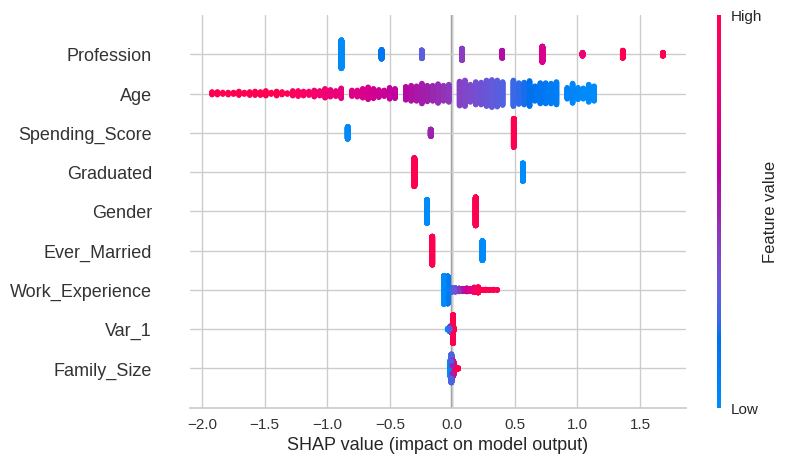

In [ ]:
shap.plots.beeswarm(shap_values_lg, max_display=15)

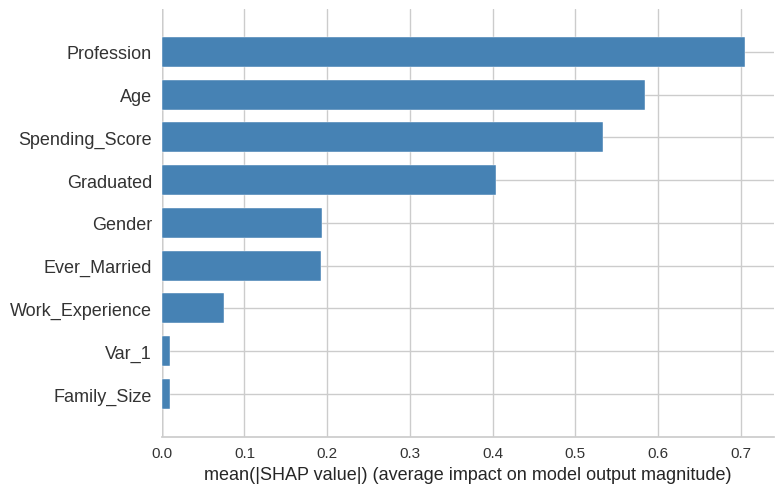

In [ ]:
shap.summary_plot(shap_values_lg, X_train, plot_type="bar", color='steelblue')

This bar chart presents the average magnitude of SHAP values for each feature in a logistic regression model.

We can make the following inferences from the above bar plot:

The "Profession" feature has the largest average impact on the model output. This means Profession greatly influences the model's predictions of segmentation, regardless of whether the impact is positive or negative.

"Age" and "Spending_Score" appear to highly impact the model's predictions.


Features such as "Work_Experience", "Var_1" and "Family_Size" also contribute to the model's predictions but to a lesser extent than the top features.

## Tree Based Model

In [ ]:
# Giving input as 1% of whole dataset as SHAP cant handle large dataset
X = X_train.head(10)
 # Using Tree explainer as this is tree based classifier model
explainer = shap.TreeExplainer(random_forest,approximate=False)
#Saving shap values
shap_values = explainer.shap_values(X)

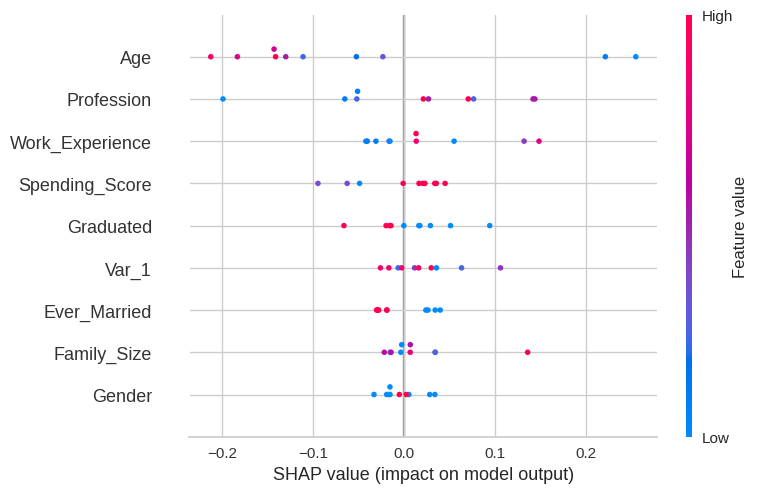

In [ ]:

shap.summary_plot(shap_values, X)

This bar chart represents the average magnitude of SHAP values for each feature, separated by the model's predicted classes (Class 0 and Class 1, which could represent, for example, income below/above a certain threshold).


##Auto-ML

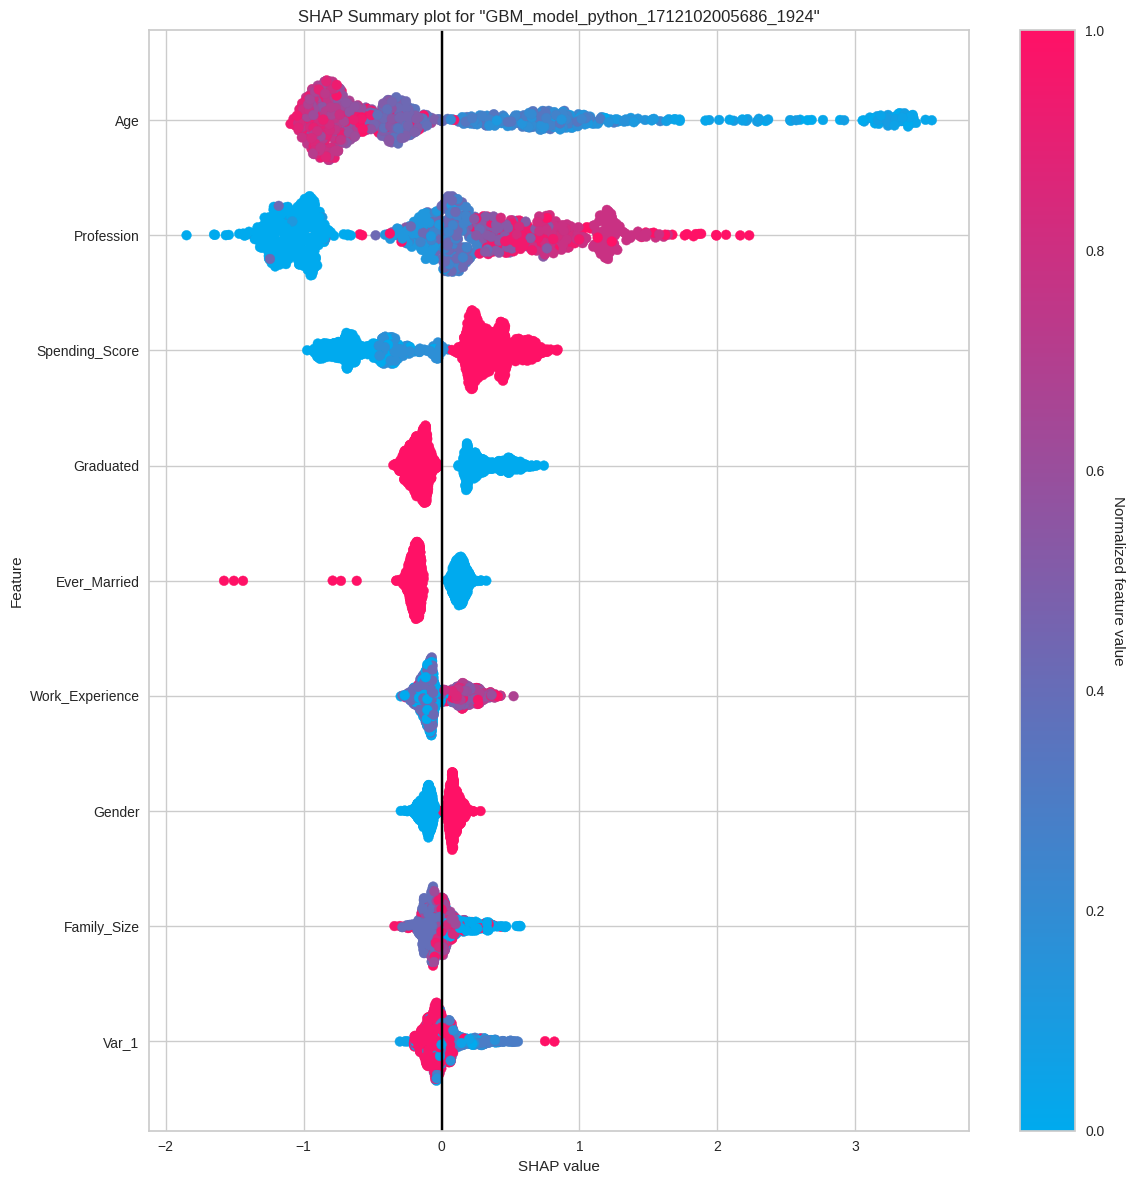

In [ ]:
# best_model = aml.leader
shap_values = best_model1.shap_summary_plot(frame=test_hf)

#**Analysing relation between all variables**

In [ ]:
#Calculating VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i)
                          for i in range(len(X_train.columns))]

print(vif_data)

           feature       VIF
0           Gender  2.223519
1     Ever_Married  4.859396
2              Age  5.852788
3        Graduated  2.995340
4       Profession  2.612029
5  Work_Experience  1.675151
6   Spending_Score  4.338720
7      Family_Size  2.309184
8            Var_1  7.446975


All  of the VIF values are below 10. Hence there is no significant multicollinearity

#**Results and Discussion**
Our findings were multifaceted and insightful:

### Model Performance:
- **The GBM model** emerged as the top performer, demonstrating high accuracy in predicting the segmentation.
- **Hyperparameter tuning** enhanced model robustness and predictive power, but not significantly.

### Feature Insights:
- **SHAP analysis** revealed crucial insights into the impact of various features on segment prediction, highlighting variables like Age, Profession and Spending_Score as significant predictors.

### Challenges Encountered:
- We faced challenges in **handling imbalanced data** and complex feature interactions.
- **Ensuring model interpretability** without compromising on performance was a delicate balance.


# **Conclusion**

In this project, we tackled the Customer Segmentation Classification dataset using a comprehensive data science approach. We started by resolving data anomalies through effective preprocessing techniques, setting a strong foundation for further analysis.Our exploration included the use of H2O.ai for Automated Machine Learning (AutoML), where we analyzed various models and performed hyperparameter tuning, particularly through Grid Search. This process highlighted the importance of regularization in model performance. The GBM model emerged as the most effective, though we recognize the potential for further refinement to enhance its accuracy and predictions.
We also focused on model interpretability, using methods like SHAP analysis to understand how different models, including Logistic Regression and Tree-based models, contribute to predictions. This analysis reinforced the importance of transparency and comprehensibility in machine learning models.
In summary, our project demonstrated the effective application of data science methods in analyzing and interpreting the adult census income dataset, combining robust preprocessing, sophisticated modeling, and insightful analysis to derive meaningful conclusions from complex data.








# **Assignment Question/Answers**

1. What is the question?
>The central question of the project was: "How can we effectively utilize data science tools and methods to predict and analyze the determinants of customer segment in the Customer Segmentation Classification dataset?" This involved understanding the variables that most significantly influence segmentation and determining how well various machine learning models can predict these outcomes based on the dataset's characteristics.

2. What did you do?
>The approach was multi-dimensional. Initially, the focus was on data preprocessing, where identifying and rectifying various data anomalies, ensuring a clean and reliable dataset for analysis. This was followed by exploratory data analysis (EDA) to gain insights into the dataset's structure and underlying patterns. We then employed H2O.ai's AutoML capabilities to efficiently explore a range of machine learning models. This involved selecting the most promising models for the dataset, and conducting hyperparameter tuning, particularly through Grid Search, to optimize their performance. Furthermore, we conducted SHAP analysis to gain a deeper understanding of the factors influencing model predictions, thus ensuring model interpretability and transparency.

3. How well did it work?
>The methodology proved to be highly effective. The GBM model, identified via AutoML, showcased superior predictive performance compared to other models. This model, being an amalgamation of various base models, leveraged the strengths of each, leading to improved accuracy. The hyperparameter tuning and regularization techniques we employed significantly enhanced the models' abilities to generalize, thus improving their performance. Additionally, the SHAP analysis provided valuable insights into how different features impacted the model predictions, affirming the relevance and applicability of the models to the dataset.

4. What did you learn?
>The project improved our knowledge in applying the Data Science methods in real-life applications. Firstly, we learned about the critical role of data preprocessing in any data science project. Addressing data anomalies upfront was crucial for the accuracy and reliability of subsequent analyses. The use of H2O.ai for AutoML highlighted the power and efficiency of automated approaches in model selection and tuning, saving time and resources while ensuring optimal results. The importance of model interpretability was another key takeaway; understanding the 'why' behind model predictions is essential for trust and applicability in real-world scenarios. Lastly, the project provided practical insights into the challenges and nuances of applying machine learning models to complex datasets like the adult census income dataset, preparing us for similar challenges in the field.








# REFERENCES
H20.ai- https://docs.h2o.ai/

GitHub Notebook:
- https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/AutoML/AutoML_Smoke_Detection_Example.ipynb
- https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/ML_Data_Cleaning_and_Feature_Selection/ML_Data_Cleaning_and_Feature_Selection_Abalone.ipynb

- https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/AutoML/CC_Kaggle_AutoML_Regression_Melbourne_Housing.ipynb

SHAP theory: https://www.datacamp.com/tutorial/introduction-to-shap-values-machine-learning-interpretability

GBM Model: https://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/gbm.html

GBM theory: https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/

Model Evaluation: https://piml.medium.com/gbm-model-evaluation-beyond-prediction-accuracy-397248b5cef0


Kaggle Notebook- https://www.kaggle.com/code/nyinyeinaung/customer-segmentation-multiclass-classification

Dataset- https://www.kaggle.com/datasets/kaushiksuresh147/customer-segmentation

# License

MIT License
Copyright (c) 2024 SangramSA

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.


